# Import libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
%matplotlib inline

# Load the dataset

In [2]:
df = pd.read_csv("Downloads//gender_submission.csv")

# Performing Data Cleanig 

In [3]:
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [4]:
df.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


# Handling Missing Values:

In [6]:
df.isnull()

,PassengerId,Survived
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
413,False,False
414,False,False
415,False,False
416,False,False


In [7]:
print(df.columns.values)

['PassengerId' 'Survived']


In [8]:
df.shape

(418, 2)

In [9]:
df.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


# Handling Outliers:

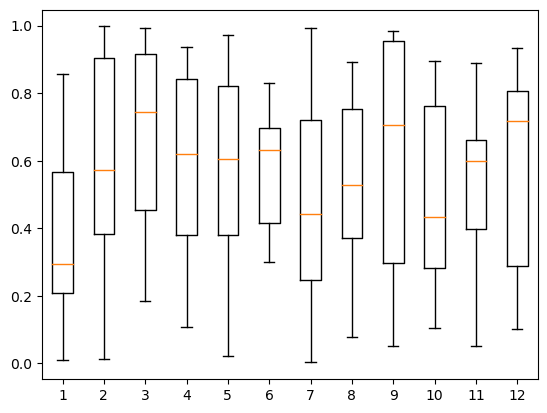

In [11]:
plt.boxplot(df)
plt.show()

In [12]:
from scipy import stats

z_scores = np.abs(stats.zscore(df))
print(z_scores)

[[1.2942943  0.04163012 0.77951002 0.85161436 0.29293951 0.87496379
  0.7390668  0.18649986 0.85647971 0.10476357 1.49532935 1.18028025]
 [1.48777367 0.1076367  0.9987461  1.24751182 0.41924227 1.42496548
  1.13475795 1.18715097 0.31271361 0.77159049 0.39331934 1.34668732]
 [0.0182022  1.15132764 0.77016851 1.9446249  1.57793212 0.72804772
  1.73407053 0.0171084  0.89233006 1.19885177 0.43352389 0.5389271 ]
 [0.28100758 0.53771474 1.13405126 0.97010972 0.72719045 0.72806533
  0.08645146 0.27836043 0.32432721 0.86519564 1.02037379 1.08955297]
 [0.43641359 1.09379993 0.91161941 1.2695468  0.41450521 0.09251672
  1.04470252 1.21645491 1.16760676 0.32854582 2.02297229 0.80664457]
 [1.73167733 1.27001096 0.28338584 0.94737515 0.14935628 0.52848986
  0.72875077 1.36631891 1.12793642 1.47440455 1.4446634  1.50392556]
 [0.31544968 0.43316818 0.06968811 0.10339377 1.08004856 0.5823066
  1.61867949 1.88470658 1.09929717 1.34777427 0.24158931 1.55786761]
 [0.85761433 1.12147309 1.79722818 1.02521

In [13]:
threshold = 3
df_no_outliers = df[(z_scores < threshold).all(axis=1)]
df_no_outliers

array([[0.01916748, 0.58408133, 0.46561044, 0.82958033, 0.47098303,
        0.42052572, 0.26250659, 0.5034498 , 0.32016944, 0.52481173,
        0.89030646, 0.93377578],
       [0.78830425, 0.56328322, 0.95645488, 0.93165568, 0.43155713,
        0.82911931, 0.14570063, 0.84731153, 0.70410082, 0.28822697,
        0.62732355, 0.16486256],
       [0.38202321, 0.23442512, 0.89336158, 0.10861815, 0.06986761,
        0.70530849, 0.99256376, 0.55441842, 0.30839715, 0.17288146,
        0.43000624, 0.73862293],
       [0.299303  , 0.4277693 , 0.99380258, 0.35988012, 0.78942054,
        0.44662294, 0.45515521, 0.48045463, 0.70791442, 0.26295688,
        0.77696339, 0.90616901],
       [0.25633911, 0.25255161, 0.93240567, 0.93733701, 0.69181463,
        0.59240332, 0.78906594, 0.8546471 , 0.98482455, 0.40783344,
        0.05070137, 0.32918837],
       [0.8557344 , 0.99736824, 0.75899704, 0.36574184, 0.51580309,
        0.66985607, 0.69579864, 0.89216209, 0.97179789, 0.89456661,
        0.1887086 ,

# Save Cleaned Dataset:

In [14]:
df_no_outliers = df[(z_scores < threshold).all(axis=1)]

In [15]:
df_no_outliers = pd.DataFrame(df_no_outliers)  # Convert back to a DataFrame
df_no_outliers.to_csv('cleaned_dataset.csv',index=False)

In [16]:
df_no_outliers

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.019167,0.584081,0.465610,0.829580,0.470983,0.420526,0.262507,0.503450,0.320169,0.524812,0.890306,0.933776
1,0.788304,0.563283,0.956455,0.931656,0.431557,0.829119,0.145701,0.847312,0.704101,0.288227,0.627324,0.164863
2,0.382023,0.234425,0.893362,0.108618,0.069868,0.705308,0.992564,0.554418,0.308397,0.172881,0.430006,0.738623
3,0.299303,0.427769,0.993803,0.359880,0.789421,0.446623,0.455155,0.480455,0.707914,0.262957,0.776963,0.906169
4,0.256339,0.252552,0.932406,0.937337,0.691815,0.592403,0.789066,0.854647,0.984825,0.407833,0.050701,0.329188
5,0.855734,0.997368,0.758997,0.365742,0.515803,0.669856,0.695799,0.892162,0.971798,0.894567,0.188709,0.117018
6,0.289781,0.460711,0.700011,0.583348,0.225284,0.679417,0.002850,0.078343,0.962394,0.860381,0.591115,0.100604
7,0.139893,0.950565,0.184694,0.874339,0.973185,0.695984,0.624015,0.719742,0.239162,0.374275,0.613960,0.494515
8,0.743634,0.925887,0.911336,0.782758,0.811506,0.402944,0.838189,0.388370,0.751343,0.882309,0.607564,0.777543
9,0.506432,0.013455,0.221730,0.658971,0.898785,0.299376,0.335101,0.712358,0.951863,0.104299,0.299314,0.794431
